### import libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Preview data
df.head()
print(df.shape)
print(df.columns)

(10841, 13)
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# checking Missing values
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


### data cleaning

#### handling missing data

In [6]:
df = df.dropna(subset=['Rating'])

# Or: fill Ratings with mean
# df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

df.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

#### fix data types

In [7]:
# Reviews to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Clean Installs: remove + and ,
df['Installs'] = df['Installs'].astype(str)
df['Installs'] = df['Installs'].replace('Free', np.nan)
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Clean Price: remove $ and convert
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].replace('Free', '0')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'] = df['Price'].fillna(0)

# Clean Size: convert to KB
def size_to_kb(size):
    if size == 'Varies with device':
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', '')) * 1024
    elif 'k' in size:
        return float(size.replace('k', ''))
    else:
        return np.nan

df['Size_KB'] = df['Size'].apply(size_to_kb)

# Last Updated to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Verify
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9367 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9367 non-null   object        
 1   Category        9367 non-null   object        
 2   Rating          9367 non-null   float64       
 3   Reviews         9366 non-null   float64       
 4   Size            9367 non-null   object        
 5   Installs        9366 non-null   float64       
 6   Type            9367 non-null   object        
 7   Price           9367 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9367 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9363 non-null   object        
 12  Android Ver     9364 non-null   object        
 13  Size_KB         7729 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(8)
memory usage: 1.

In [8]:
# Summary stats
df.describe()

# Number of unique categories
print(df['Category'].nunique())

# Top categories
print(df['Category'].value_counts().head(10))


34
Category
FAMILY             1747
GAME               1097
TOOLS               734
PRODUCTIVITY        351
MEDICAL             350
COMMUNICATION       328
FINANCE             323
SPORTS              319
PHOTOGRAPHY         317
PERSONALIZATION     314
Name: count, dtype: int64


## EDA 

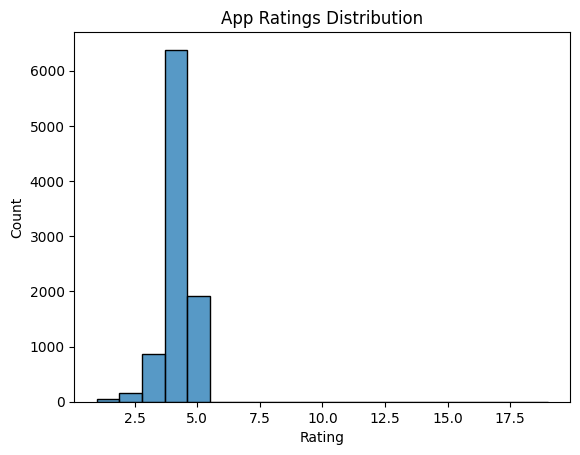

In [9]:
# Ratings distribution
sns.histplot(df['Rating'], bins=20)
plt.title('App Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Top categories for Apps

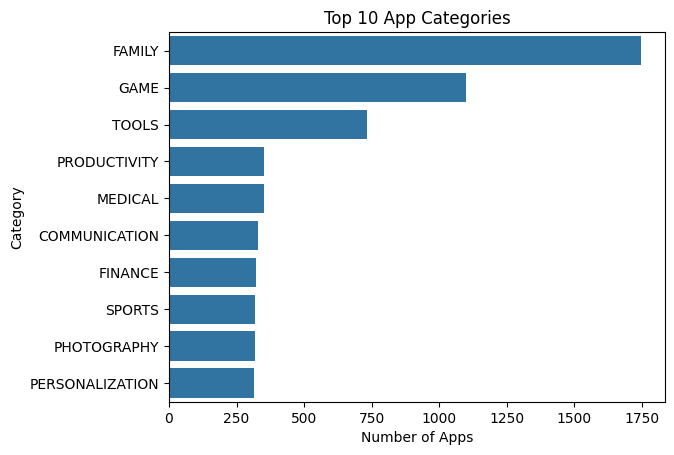

In [10]:

top_categories = df['Category'].value_counts().head(10)
sns.barplot(y=top_categories.index, x=top_categories.values)
plt.title('Top 10 App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

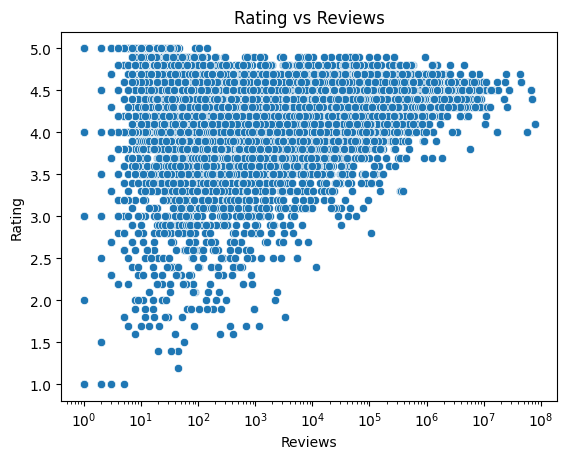

In [11]:
# Ratings vs Reviews
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title('Rating vs Reviews')
plt.xscale('log')
plt.show()


### Average rating per category

In [12]:
# Average rating per category
category_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(category_rating.head(10))     

Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
Name: Rating, dtype: float64


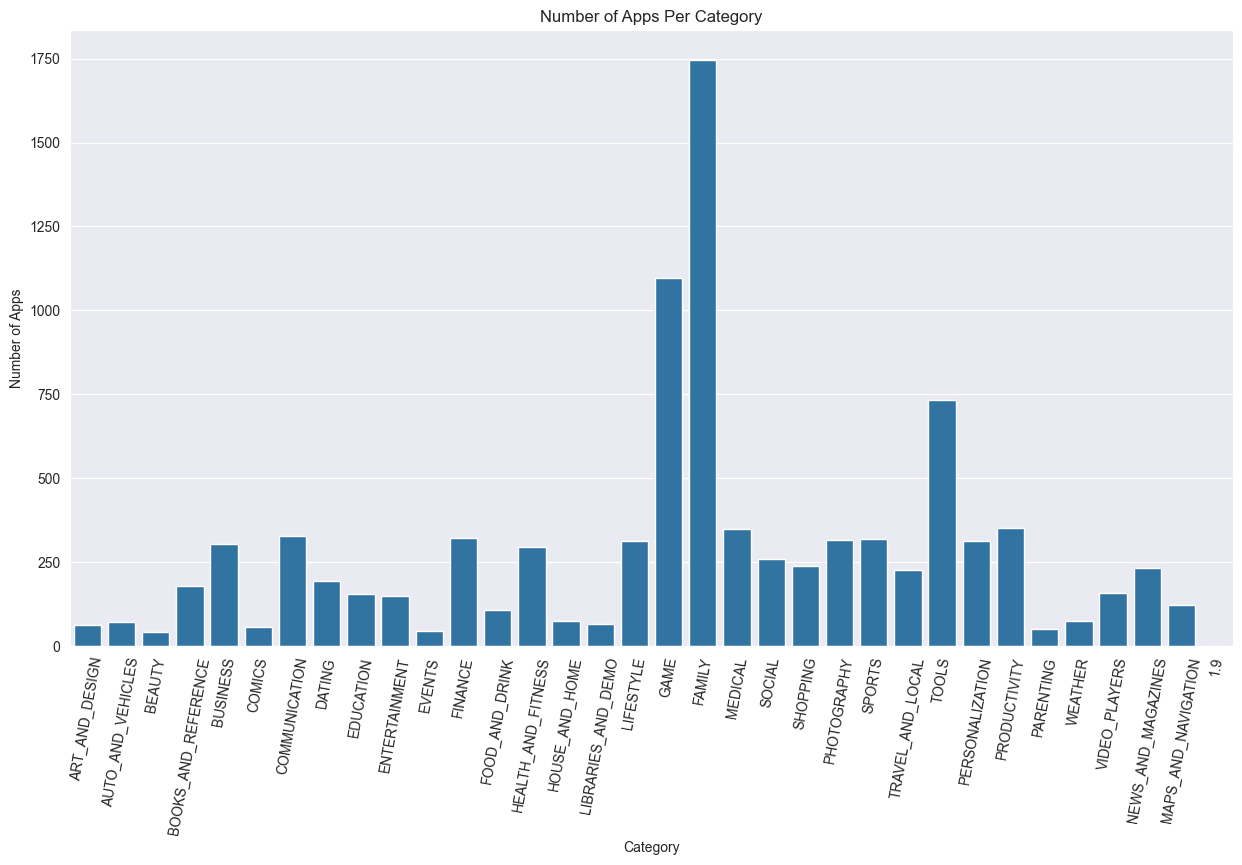

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
sns.countplot(x='Category', data=df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=80)
plt.ylabel('Number of Apps')
plt.show()

In [14]:
# Apps with huge installs
popular_apps = df[df['Installs'] > 1e8][['App', 'Installs', 'Rating']]
print(popular_apps)

                                                    App      Installs  Rating
152                                   Google Play Books  1.000000e+09     3.9
335            Messenger – Text and Video Chat for Free  1.000000e+09     4.0
336                                  WhatsApp Messenger  1.000000e+09     4.4
338                        Google Chrome: Fast & Secure  1.000000e+09     4.3
340                                               Gmail  1.000000e+09     4.3
...                                                 ...           ...     ...
5395                                      Google Photos  1.000000e+09     4.5
5596                                     Samsung Health  5.000000e+08     4.3
5856                                  Google Play Games  1.000000e+09     4.3
7536  Security Master - Antivirus, VPN, AppLock, Boo...  5.000000e+08     4.7
9844                                        Google News  1.000000e+09     3.9

[130 rows x 3 columns]


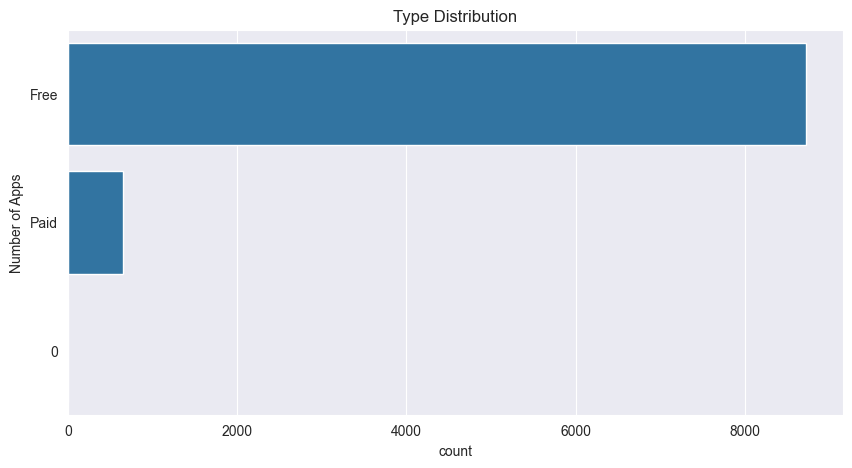

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(df['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

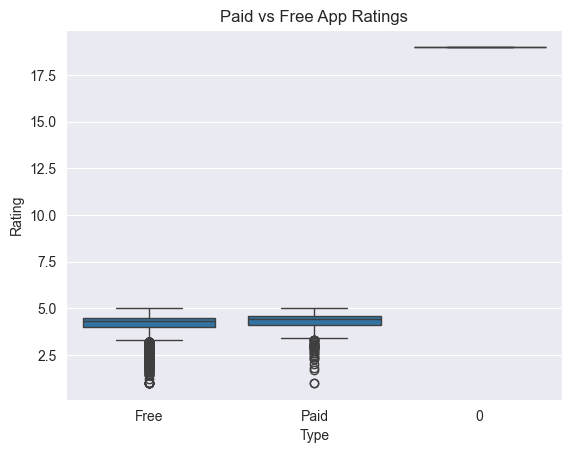

In [16]:
# Paid vs Free ratings
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Paid vs Free App Ratings')
plt.show()


### Sentiment Analysis of User Reviews

In [17]:
df_reviews = pd.read_csv("googleplaystore_user_reviews.csv")
df_reviews.info()
df_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [18]:
from textblob import TextBlob
df_reviews['Translated_Review'] = df_reviews['Translated_Review'].fillna("")
if 'Sentiment_Polarity' not in df_reviews.columns:
    df_reviews['Polarity'] = df_reviews['Translated_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
else:
    df_reviews['Polarity'] = df_reviews['Sentiment_Polarity']

In [19]:
# Average polarity per app
app_sentiment = df_reviews.groupby('App')['Polarity'].mean().reset_index()

#Merge with main data
df_sentiment = df.merge(app_sentiment, on='App', how='left')

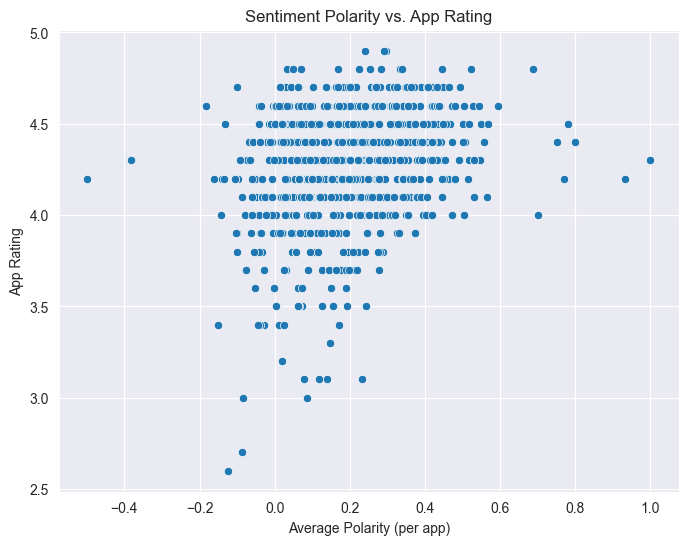

In [20]:
# Sentiment Polarity vs. App Rating
plt.figure(figsize=(8,6))
sns.scatterplot(x='Polarity', y='Rating', data=df_sentiment)
plt.title('Sentiment Polarity vs. App Rating')
plt.xlabel('Average Polarity (per app)')
plt.ylabel('App Rating')
plt.show()


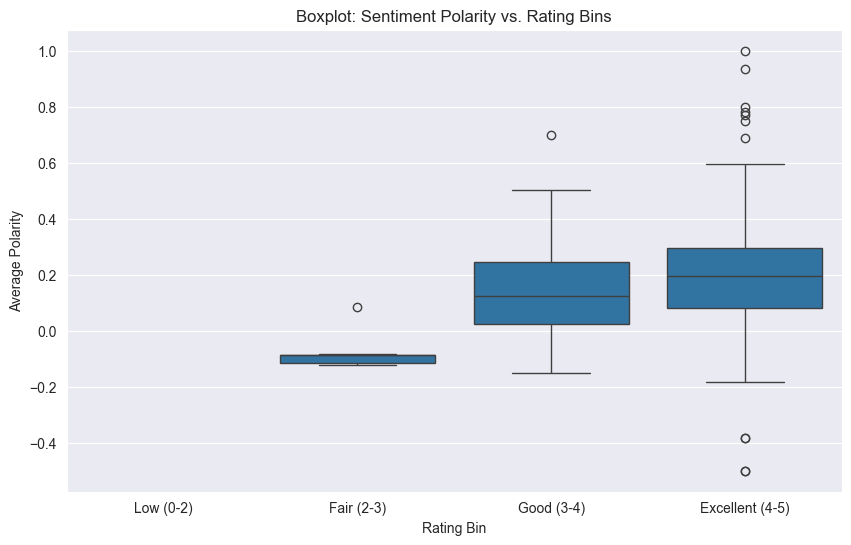

In [21]:
#Rating bins vs. Polarity
df_sentiment['Rating_Bin'] = pd.cut(df_sentiment['Rating'], bins=[0, 2, 3, 4, 5],
                                    labels=['Low (0-2)', 'Fair (2-3)', 'Good (3-4)', 'Excellent (4-5)'])

plt.figure(figsize=(10,6))
sns.boxplot(x='Rating_Bin', y='Polarity', data=df_sentiment)
plt.title('Boxplot: Sentiment Polarity vs. Rating Bins')
plt.xlabel('Rating Bin')
plt.ylabel('Average Polarity')
plt.show()

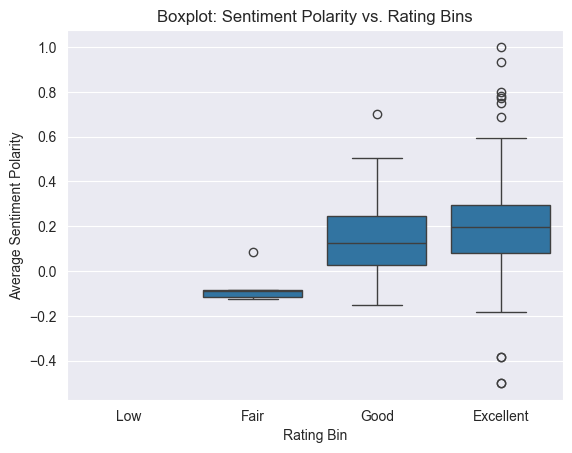

In [22]:
# Categorical Sentiment vs. Rating
df_sentiment['Rating_Bin'] = pd.cut(df_sentiment['Rating'], bins=[0, 2, 3, 4, 5],
                                    labels=['Low','Fair','Good','Excellent'])

sns.boxplot(x='Rating_Bin', y='Polarity', data=df_sentiment)
plt.title('Boxplot: Sentiment Polarity vs. Rating Bins')
plt.xlabel('Rating Bin')
plt.ylabel('Average Sentiment Polarity')
plt.show()


#### Time Series: Updates vs. Ratings

<Axes: xlabel='Year'>

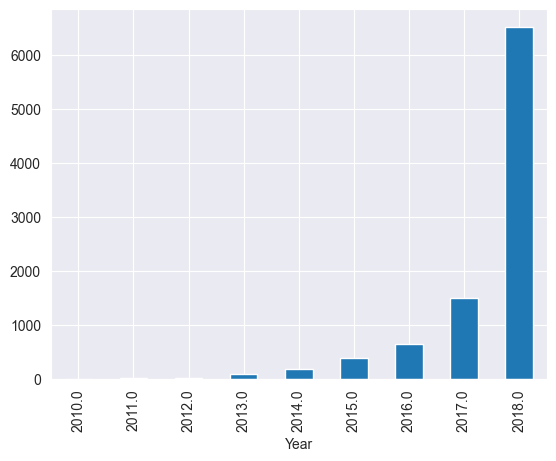

In [23]:
df['Year'] = df['Last Updated'].dt.year
updates_per_year = df.groupby('Year').size()
updates_per_year.plot(kind='bar')


<Axes: xlabel='Year', ylabel='Rating'>

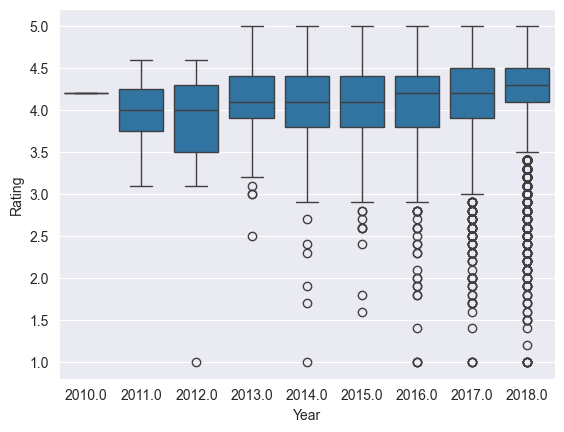

In [24]:
sns.boxplot(x='Year', y='Rating', data=df)

#### predictive modelling

In [25]:
# data preparation
df_model = df_sentiment[['Rating', 'Reviews', 'Installs', 'Price', 'Polarity', 'Size_KB', 'Category']]
df_model = df_model.dropna()
df_model = pd.get_dummies(df_model, columns=['Category'], drop_first=True)

In [26]:
# train test split
from sklearn.model_selection import train_test_split
X = df_model.drop('Rating', axis=1)
y = df_model['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#fit model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
# prediction
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE: {rmse:.2f}")

RMSE: 0.23


##  **Project Summary**

This project performed a comprehensive **Exploratory Data Analysis (EDA)** and built a simple **predictive model** on the **Google Play Store dataset**, which includes app details and user reviews.
The goal was to uncover patterns about app ratings, analyze user sentiment, study trends over time, and forecast app ratings using available features.

**Key techniques used:**

* Data cleaning (handling missing values, fixing data types, standardizing `Installs`, `Price`, `Size`).
* EDA: Distribution of ratings, top categories, installs, paid vs. free apps.
* Sentiment analysis of user reviews with polarity scores.
* Time series: app updates vs. ratings.
* Machine learning: Random Forest regression for rating prediction.

## **Key Findings**

1️⃣ **App Ratings:**

* Most apps have ratings between **4.0 and 4.5**, showing generally positive user feedback.
* Some categories (like **Events**, **Education**, and **Art & Design**) tend to have slightly higher average ratings than others.

2️⃣ **Categories & Popularity:**

* The **Family** and **Game** categories have the highest number of apps.
* Apps with very large install counts (100M+ to 1B+) are mostly well-known Google or communication apps with high ratings.

3️⃣ **Paid vs. Free:**

* Free apps are far more common.
* Paid apps tend to have slightly higher median ratings based on the boxplot comparison.

4️⃣ **Sentiment Analysis:**

* There is a **positive correlation** between average **review sentiment polarity** and higher app ratings.
* Apps with higher binned ratings (4–5) have higher average sentiment scores in user reviews.

5️⃣ **Time Series Trends:**

* Apps that have been **updated more recently** often maintain better ratings.
* Frequent updates can be linked to user trust and app quality perception.

6️⃣ **Predictive Modeling:**

* The Random Forest model achieved an **RMSE of \~0.23**, meaning the model predicts app ratings with a typical error of about ±0.23 stars — reasonable given the limited features used.


##  **Insights**

✔️ **User Engagement:** More installs and reviews don’t always equal better ratings — but a large number of reviews can signal active user engagement and trust.

✔️ **Sentiment Matters:** Text reviews’ polarity scores are a good predictor of star ratings — so combining **structured data** (like installs, price) with **unstructured sentiment** improves predictive power.

✔️ **App Maintenance:** Keeping an app updated positively impacts ratings — developers should maintain frequent updates to keep ratings high.

✔️ **Category Impacts:** Some app categories naturally trend higher in ratings, so new app developers may find certain niches more competitive.


## **Conclusion**

The EDA and modeling demonstrate that combining **basic app metrics** with **user-generated text insights** offers a clearer picture of app performance.
The project’s predictive model shows that ratings can be estimated fairly well using only a handful of accessible features.
